# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [36]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [37]:
# your code here
df = pd.read_csv('exch_rates.csv')
df.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [38]:
df['Frequency'] = pd.to_datetime(df['Frequency'], format='%Y-%m-%d')
df.set_index('Frequency', inplace=True)

In [39]:
df.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


Plot the three exchange rates in one plot

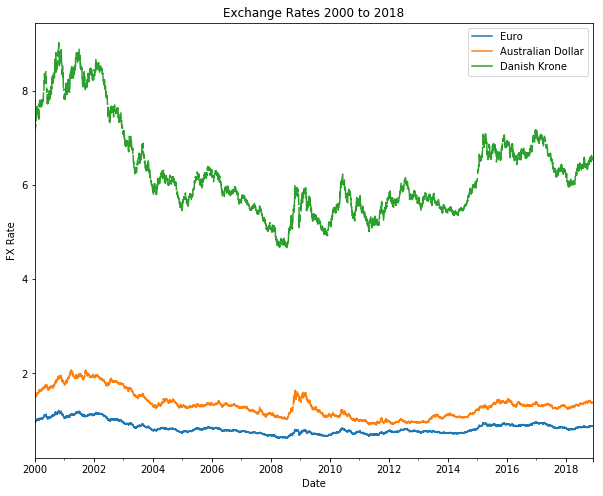

In [41]:
# your code here
df.plot(subplots=False, figsize=(10,8))
plt.title('Exchange Rates 2000 to 2018')
plt.xlabel('Date')
plt.ylabel('FX Rate')
plt.show()

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [42]:
# your code here
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [43]:
# your code here
diff_df = df.diff(periods=1)

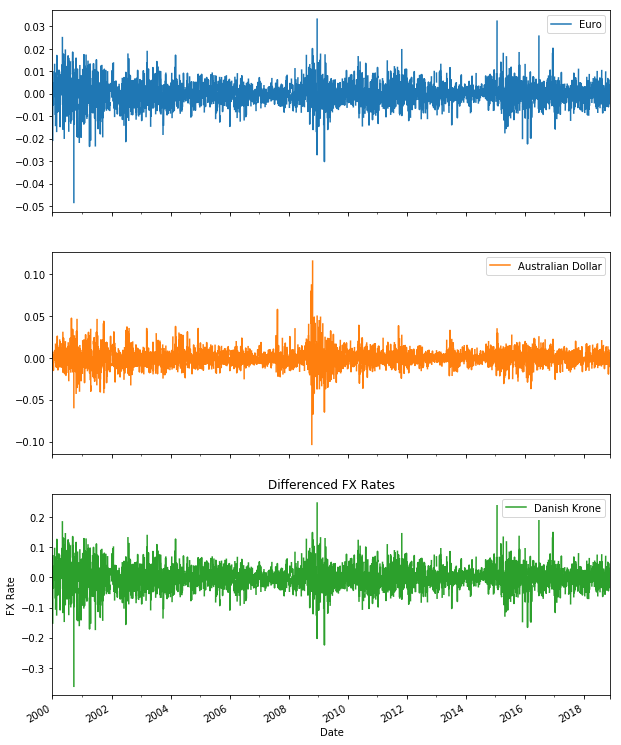

In [44]:
# your code here
diff_df.plot(subplots=True, figsize=(10,14))
plt.xlabel('Date')
plt.ylabel('FX Rate')
plt.title('Differenced FX Rates')
plt.show()

In [45]:
# your code here

### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [46]:
# your code here
eur = df[['Euro']]
eur.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,0.991080
2000-01-04,0.970403
2000-01-05,0.964506


In [47]:
lag_1_eur = eur.shift(periods=1)
lag_1_eur.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


In [48]:
# your code here
lag_1 = pd.concat([lag_1_eur, eur], axis=1)
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


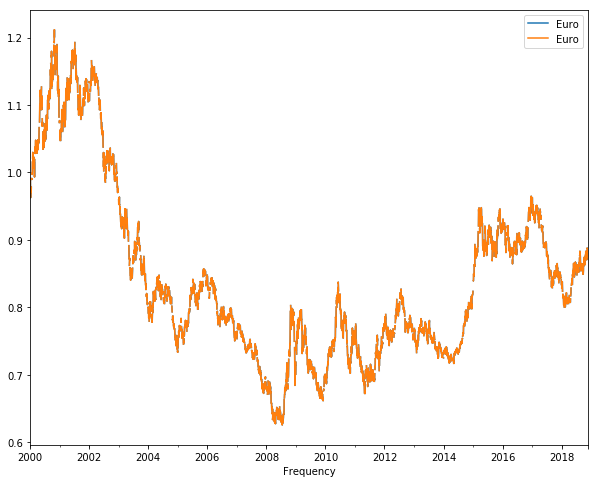

In [49]:
# your code here
lag_1.plot(subplots=False, figsize=(10,8))

Repeat this, but for a "lag 5 autocorrelation"

In [58]:
# your code here
lag_5_eur = eur.shift(periods=50)
lag_5_eur.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN


In [59]:
# your code here
lag_5 = pd.concat([lag_5_eur, eur], axis=1)
lag_5.head()

,Euro,Euro
Frequency,,
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,NaN,0.991080
2000-01-04,NaN,0.970403
2000-01-05,NaN,0.964506


In [60]:
lag_5.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


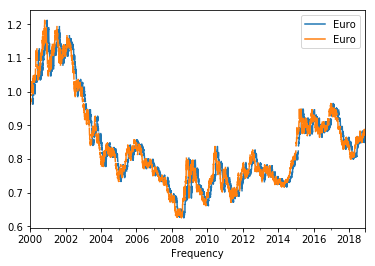

In [61]:
lag_5.plot()

In [54]:
# Very high degree of autocorrelation

### What's your conclusion here?

Knowing this, let's plot the ACF now.

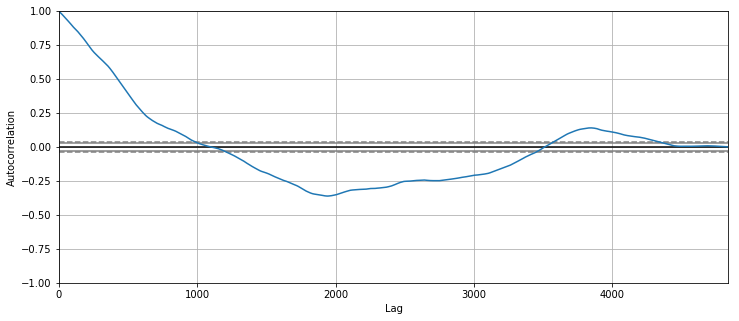

In [62]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna())

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

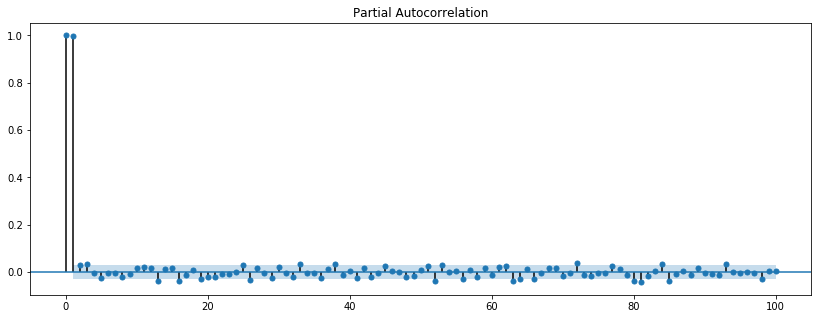

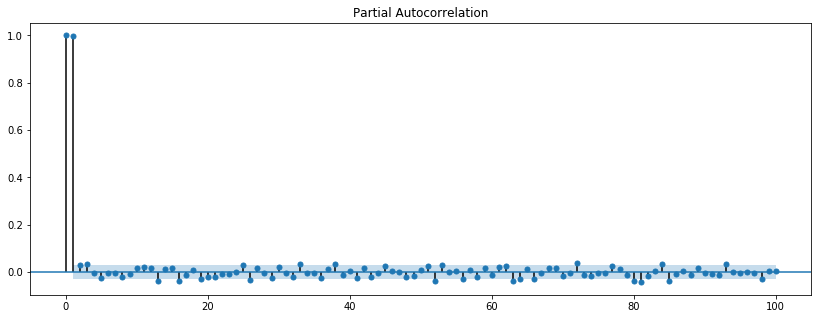

In [63]:
# your code here
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(eur.dropna(), lags = 100)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [65]:
# your code here
df_air = pd.read_csv('passengers.csv')
df_air.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [70]:
# your code here
df_air['Month'] = pd.to_datetime(df_air['Month'], format='%Y-%m-%d')
df_air.set_index('Month', inplace=True)
df_air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 1.0, 'Autocorrelation Plot - Air Passengers')

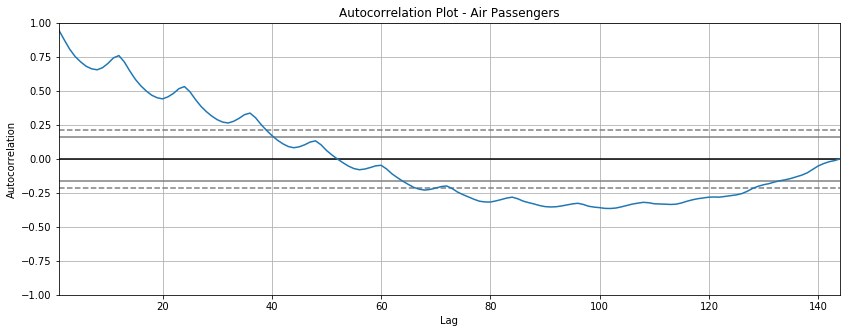

In [72]:
# your code here
pd.plotting.autocorrelation_plot(df_air)
plt.title('Autocorrelation Plot - Air Passengers')

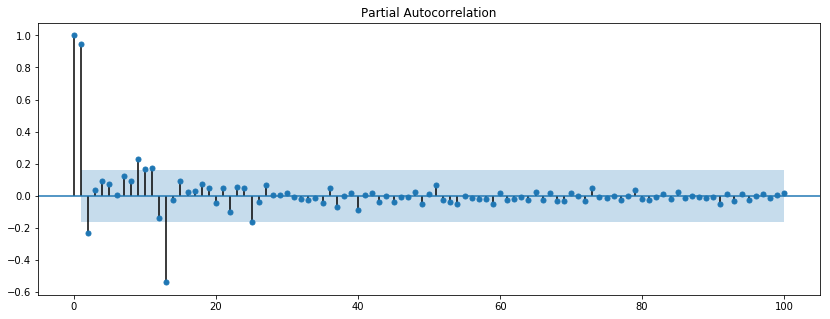

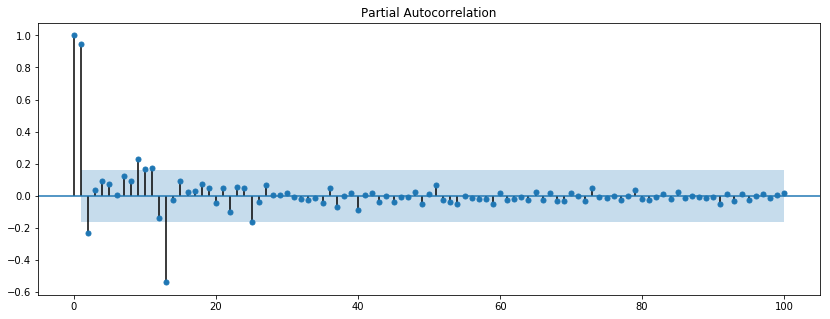

In [74]:
# your code here

rcParams['figure.figsize'] = 14, 5

plot_pacf(df_air['#Passengers'], lags = 100, method='ywm')

In [ ]:
# your code here


In [ ]:
# your code here

In [ ]:
# your code here

### Your conclusion here

Once initial lags have been controlled for, impact of further lags falls.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [75]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [77]:
# your code here
nyse['Month'] = pd.to_datetime(nyse['Month'], format='%Y-%m')
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


In [79]:
# your code here
nyse_1_lag = nyse.shift(periods=1)
nyse_1_lag.head()

,monthly_return
Month,
1961-01-01,NaN
1961-02-01,0.082
1961-03-01,0.059
1961-04-01,0.050
1961-05-01,0.008


In [80]:
nyse_12_lags = nyse.shift(periods=12)
nyse_12_lags.head()

,monthly_return
Month,
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN


In [84]:
nyse_lags = pd.concat([nyse, nyse_1_lag, nyse_12_lags], axis=1)
nyse_lags.columns = ['Original', '1 Lag', '12 Lags']
nyse_lags.corr()

,Original,1 Lag,12 Lags
Original,1.000000,0.082633,-0.049915
1 Lag,0.082633,1.000000,-0.075251
12 Lags,-0.049915,-0.075251,1.000000


## Your conclusion here

Autocorrelation close to zero



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!